In [2]:
from sympy import *
from dtumathtools import dtuplot, dtutools
init_printing()

In [3]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

In [4]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

⎛⎡ Iₜ    ⎤  ⎡                      2                   ⎤  ⎡ 2                ⎤
⎜⎢───  0 ⎥  ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c             ⎥  ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
⎜⎢  2    ⎥  ⎢k₂ + ────────────────────────      -k₂    ⎥  ⎢──────────────────⎥
⎜⎢l₂     ⎥, ⎢                 2                        ⎥, ⎢        l₂        ⎥
⎜⎢       ⎥  ⎢               l₂                         ⎥  ⎢                  ⎥
⎜⎣ 0   m₂⎦  ⎢                                          ⎥  ⎣        0         ⎦
⎝           ⎣             -k₂               k₂ + k_{b2}⎦                      

                  ⎞
                  ⎟
  ⎡y₁(t)⎤  ⎡z₁(t)⎤⎟
, ⎢     ⎥, ⎢     ⎥⎟
  ⎣y₂(t)⎦  ⎣z₂(t)⎦⎟
                  ⎟
                  ⎠

In [5]:
k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
diff_eq = Eq(Add(MatMul(M,yt), MatMul(K_til,yt), evaluate=False), f_til)
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
la = symbols('lambda')
A = - M.inv() * K_til
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A = A_func

In [6]:
mydict = {g:9.81,kc:0.7,u:1.48*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83, eta:33, Fs0:5.2}
v50 = {ks:0.995, eta:21, Fs0:8}
v70 = {ks:1.37, eta:10.5, Fs0:9.65}

A = A.subs(mydict)  
A

⎡-4296.14915128205                               3569.29775641026             
⎢                                                                             
⎣1141.84397163121   -146.572104018913⋅F_{0s} - 1.41843971631206⋅kₛ⋅(ⅈ⋅η + 1) -

                 ⎤
                 ⎥
 1652.48226950355⎦

In [7]:
A30 = A.subs(v30)

A50 = A.subs(v50)

A70 = A.subs(v70)

In [8]:
A50

⎡-4296.14915128205             3569.29775641026           ⎤
⎢                                                         ⎥
⎣1141.84397163121   -2826.47044917258 - 29.6382978723404⋅ⅈ⎦

In [9]:
A30.eigenvects()

⎡⎛                                           ⎡⎡-0.940695026790818 + 0.00820573
⎢⎜-5582.91051492006 - 11.2244888611244⋅ⅈ, 1, ⎢⎢                               
⎣⎝                                           ⎣⎣            0.339154142696904  

351695621⋅ⅈ⎤⎤⎞  ⎛                                           ⎡⎡-0.8518177591352
           ⎥⎥⎟, ⎜-1129.07315172842 - 27.6265749686628⋅ⅈ, 1, ⎢⎢                
           ⎦⎦⎠  ⎝                                           ⎣⎣-0.7559087855250

25 - 0.0105677694365148⋅ⅈ⎤⎤⎞⎤
                         ⎥⎥⎟⎥
36 - 0.0027837749739343⋅ⅈ⎦⎦⎠⎦

In [10]:
A50.eigenvects()
vals = [tup[0] for tup in A30.eigenvects()]
values = [sqrt(val).evalf() for val in vals] + [-sqrt(val).evalf() for val in vals]
print([-re(val)/abs(val) for val in values])
values


[-0.00100525270976900, -0.0122314372645130, 0.00100525270976900, 0.0122314372645130]


In [11]:
[x[2] for x in A30.eigenvects()]

⎡⎡⎡-0.940695026790818 + 0.00820573351695621⋅ⅈ⎤⎤  ⎡⎡-0.851817759135225 - 0.0105
⎢⎢⎢                                          ⎥⎥, ⎢⎢                           
⎣⎣⎣            0.339154142696904             ⎦⎦  ⎣⎣-0.755908785525036 - 0.0027

677694365148⋅ⅈ⎤⎤⎤
              ⎥⎥⎥
837749739343⋅ⅈ⎦⎦⎦

In [12]:
def find_faktorer(A):
    values = [sqrt(val) for val in A.eigenvals().keys()] + [-sqrt(val) for val in A.eigenvals().keys()]
    values = [val for val in values if re(val)/abs(val) > 0]
    xi = list(set([-re(lamb)/abs(lamb) for lamb in values]))
    omega_n = list(set([abs(lamb) for lamb in values]))
    eigenvects = [x[2] for x in A.eigenvects()]
    arguments = [arg(value) for vector in eigenvects for value in vector[0]]
    omega_d = list(set([abs(im(lamb)) for lamb in values]))
    return values, xi, omega_n, arguments, omega_d

values30, xi30, omega_n30, arguments30, omega_d30 = find_faktorer(A30)
values50, xi50, omega_n50, arguments50, omega_d50 = find_faktorer(A50)
values70, xi70, omega_n70, arguments70, omega_d70 = find_faktorer(A70)

In [13]:
arguments30

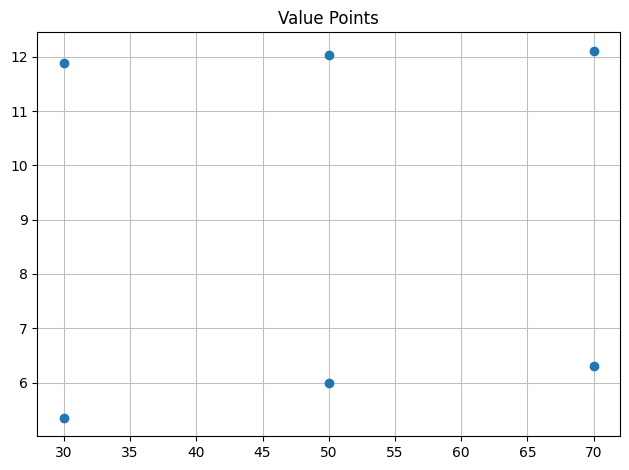

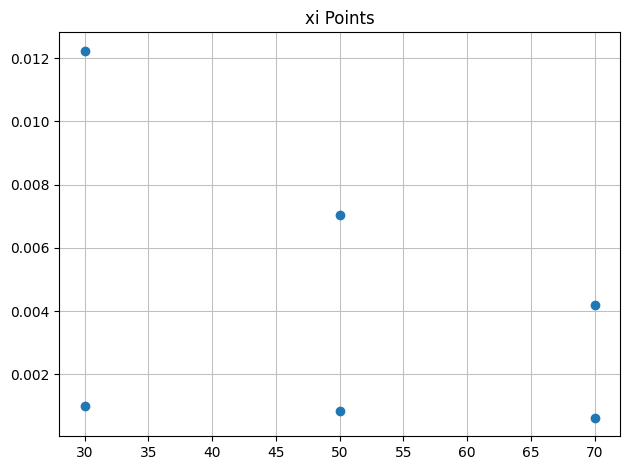

In [44]:
def make_points(number, values):
    points = []
    for i in range(len(values)):
        points.append((number, abs(values[i])))
    return points

valuePoints30 = make_points(30, values30)
valuePoints50 = make_points(50, values50)
valuePoints70 = make_points(70, values70)

xiPoints30 = make_points(30, xi30)
xiPoints50 = make_points(50, xi50) 
xiPoints70 = make_points(70, xi70)

valuePoints = [valuePoints30, valuePoints50, valuePoints70]
# omskrivning til frekvens ved at dividere med 2*pi
points = [[val[0], val[1]/(2*pi)] for lst in valuePoints for val in lst]
x = [val[0] for val in points]
y = [val[1] for val in points]

dtuplot.scatter(x,y, title="Value Points")

xiPoints = [xiPoints30, xiPoints50, xiPoints70]
points = [[val[0], val[1]] for lst in xiPoints for val in lst]
x = [val[0] for val in points]
y = [val[1] for val in points]

xi_symbol = symbols("xi")
dtuplot.scatter(x,y, title=f"{xi_symbol} Points")


---

## 6, 7, 8 er 30 grader
## 9 ved 50 grader 
### Skal være længst væk fra egensvingningsfrekvenserne

---

In [15]:
values50[0].evalf()

In [16]:
C_1, xi, omega_n, t, A_11, A_12, omega_d, phi_11, phi_12, phi_c = symbols("C_1, xi, omega_n, t, A_11, A_12, omega_d, phi_11, phi_12, phi_c")
y = C_1*exp(-xi*omega_n*t)*Matrix([A_11*cos(omega_d*t+phi_11+phi_c), A_12*cos(omega_d*t+phi_12+phi_c)])
y1 = y
y2 = y
y1

⎡        -ωₙ⋅t⋅ξ                       ⎤
⎢A₁₁⋅C₁⋅ℯ       ⋅cos(ω_d⋅t + φ₁₁ + φ_c)⎥
⎢                                      ⎥
⎢        -ωₙ⋅t⋅ξ                       ⎥
⎣A₁₂⋅C₁⋅ℯ       ⋅cos(ω_d⋅t + φ₁₂ + φ_c)⎦

In [17]:
c = 1
C_1_bestemt, phi_c1_bestemt = abs(c), arg(c)
y1 = y1.subs({
    C_1:C_1_bestemt,
    phi_c:phi_c1_bestemt,
    xi: xi30[0],
    omega_n: omega_n30[0],
    A_11: A30[0],
    A_12: A30[1],
    omega_n: omega_n30[0],
    phi_11: arguments30[0],
    phi_12: arguments30[1],
    omega_d: omega_d30[0],
})

y2 = y1.subs({
    C_1:C_1_bestemt,
    phi_c:phi_c1_bestemt,
    xi: xi30[1],
    omega_n: omega_n30[1],
    A_11: A30[2],
    A_12: A30[3],
    omega_n: omega_n30[1],
    phi_11: arguments30[2],
    phi_12: arguments30[3],
    omega_d: omega_d30[1],
})

y_hom = y1 + y2
y_hom

⎡                 0.0337832382786437⋅t                                        
⎢8592.2983025641⋅ℯ                    ⋅cos(33.6041979628697⋅t - 0.008722832760
⎢                                                                             
⎢                            0.0337832382786437⋅t                             
⎣          7138.59551282051⋅ℯ                    ⋅cos(33.6041979628697⋅t)     

      ⎤
28969)⎥
      ⎥
      ⎥
      ⎦

---
### 4.8

In [20]:
def eigenvects(A):
    return [x[2][0] for x in A.eigenvects()]

eigenvects30 = eigenvects(A30)
eigenvects50 = eigenvects(A50)
eigenvects70 = eigenvects(A70)

display(eigenvects30)
display(eigenvects50)
display(eigenvects70)

⎡⎡-0.940695026790818 + 0.00820573351695621⋅ⅈ⎤  ⎡-0.851817759135225 - 0.0105677
⎢⎢                                          ⎥, ⎢                              
⎣⎣            0.339154142696904             ⎦  ⎣-0.755908785525036 - 0.0027837

694365148⋅ⅈ⎤⎤
           ⎥⎥
749739343⋅ⅈ⎦⎦

⎡⎡-0.929722984266582 + 0.00641317783221533⋅ⅈ⎤  ⎡-0.893440258950624 - 0.0082710
⎢⎢                                          ⎥, ⎢                              
⎣⎣            0.368203807254261             ⎦  ⎣-0.721742912035037 - 0.0017029

5312034515⋅ⅈ⎤⎤
            ⎥⎥
0766378897⋅ⅈ⎦⎦

⎡⎡ 0.922217615954222 - 0.00575594304068128⋅ⅈ ⎤  ⎡0.917101860968642 + 0.0070137
⎢⎢                                           ⎥, ⎢                             
⎣⎣-0.386628041342925 + 0.000543682588015327⋅ⅈ⎦  ⎣0.699843019867085 + 0.0019682

184773116⋅ⅈ ⎤⎤
            ⎥⎥
6497802972⋅ⅈ⎦⎦

In [22]:
A[0]/A[1], A[2]/A[3]

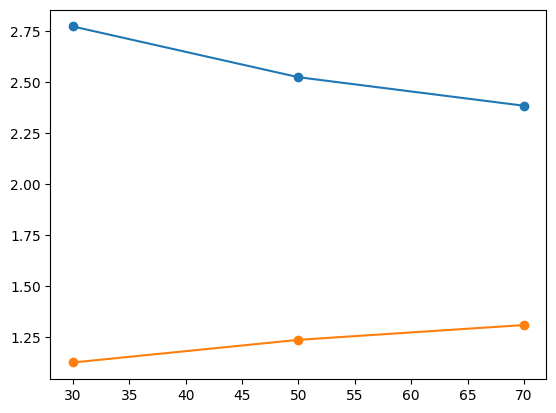

In [38]:
import matplotlib.pyplot as plt

def get_divs(A):
    return A[0][0]/A[0][1], A[1][0]/A[1][1]

div_A11_A12 = [abs(get_divs(x)[0]) for x in [eigenvects30, eigenvects50, eigenvects70]]
div_A21_A22 = [abs(get_divs(x)[1]) for x in [eigenvects30, eigenvects50, eigenvects70]]

display(div_A11_A12)
display(div_A21_A22)

x = [30, 50, 70]
plt.plot(x, div_A11_A12, marker='o', linestyle='-')
plt.plot(x, div_A21_A22, marker='o', linestyle='-')
plt.show()
